# 6th of July, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

As the consensus sequence are all the same (expected), the data that should be looked at are the secondary mutations. These are not as high in frequency. As the consensus does not change, this makes it easier to ca

In [1]:
# Import the usual packages for bioinformatic analysis
import numpy as np
import matplotlib.pyplot as plt
import os
from Bio import Seq, SeqIO
import glob
import pandas as pd
import seaborn as sns
import skbio

In [47]:
# Import the passage files
pv1_passage_rep_1_file_names = '../../data/sequence/Cirseq/PV_replicates_1/*/Q20*'
pv1_passage_rep_1_files = sorted(glob.glob(pv1_passage_rep_1_file_names))

pv1_passage_rep_2_file_names = '../../data/sequence/Cirseq/PV_replicates_2/*/Q20*'
pv1_passage_rep_2_files = sorted(glob.glob(pv1_passage_rep_2_file_names))

pv1_passage_rep_1_files

['../../data/sequence/Cirseq/PV_replicates_1/p1/Q20threshold.txt',
 '../../data/sequence/Cirseq/PV_replicates_1/p2/Q20threshold.txt',
 '../../data/sequence/Cirseq/PV_replicates_1/p3/Q20threshold.txt',
 '../../data/sequence/Cirseq/PV_replicates_1/p4/Q20threshold.txt',
 '../../data/sequence/Cirseq/PV_replicates_1/p5/Q20threshold.txt',
 '../../data/sequence/Cirseq/PV_replicates_1/p6/Q20threshold.txt',
 '../../data/sequence/Cirseq/PV_replicates_1/p7/Q20threshold.txt']

In [3]:
# Go through each series of passages and find how the consensus sequence changes over each iteration
rep_1_sequences = []

for file in pv1_passage_rep_1_files:
    # Read a test file into a pandas dataframe
    test_df = pd.read_csv(pv1_passage_rep_1_files[0], delimiter='\t', header=None)
    # Set the position as the index
    test_df = test_df.set_index(0)
    # Rename the columns
    test_df = test_df.rename(columns={1: 'Consensus', 2: 'A', 3:'C', 4:'G', 5:'T'})
    # Return the consensus sequence as a Bio.Seq object
    temp_seq = skbio.DNA(test_df.sum(axis=0)[0])
    rep_1_sequences.append(temp_seq)
    
# Go through each series of passages and find how the consensus sequence changes over each iteration
rep_2_sequences = []

for file in pv1_passage_rep_1_files:
    # Read a test file into a pandas dataframe
    test_df = pd.read_csv(pv1_passage_rep_2_files[0], delimiter='\t', header=None)
    # Set the position as the index
    test_df = test_df.set_index(0)
    # Rename the columns
    test_df = test_df.rename(columns={1: 'Consensus', 2: 'A', 3:'C', 4:'G', 5:'T'})
    # Return the consensus sequence as a Bio.Seq object
    temp_seq = skbio.DNA(test_df.sum(axis=0)[0])
    rep_2_sequences.append(temp_seq)

In [8]:
# From the nucleotide sequence, find the domain of the polyprotein and extract 
# a dictionary for each position


# Read a test file into a pandas dataframe
test_df = pd.read_csv(pv1_passage_rep_1_files[0], delimiter='\t', header=None)
# Set the position as the index
test_df = test_df.set_index(0)
# Rename the columns
test_df = test_df.rename(columns={1: 'Consensus', 2: 'A', 3:'C', 4:'G', 5:'T'})
# Show the first few rows
test_df.head()

,Consensus,A,C,G,T
0,,,,,
1,T,0,0,0,126
2,T,0,0,0,198
3,A,283,0,0,0
4,A,522,0,0,0
5,A,957,0,0,0


In [9]:
# Assign a new column that has the sum of the counts of each nucleotide
test_df['Total_counts'] = test_df['A'] + test_df['C'] + test_df['G'] + test_df['T']
test_df.head()

,Consensus,A,C,G,T,Total_counts
0,,,,,,
1,T,0,0,0,126,126
2,T,0,0,0,198,198
3,A,283,0,0,0,283
4,A,522,0,0,0,522
5,A,957,0,0,0,957


In [10]:
# Create columns that have the probability for each nucleotide
test_df['A_prob'] = test_df['A'] / test_df['Total_counts'] * 100
test_df['C_prob'] = test_df['C'] / test_df['Total_counts'] * 100
test_df['G_prob'] = test_df['G'] / test_df['Total_counts'] * 100
test_df['T_prob'] = test_df['T'] / test_df['Total_counts'] * 100

test_df.head()

,Consensus,A,C,G,T,Total_counts,A_prob,C_prob,G_prob,T_prob
0,,,,,,,,,,
1,T,0,0,0,126,126,0.0,0.0,0.0,100.0
2,T,0,0,0,198,198,0.0,0.0,0.0,100.0
3,A,283,0,0,0,283,100.0,0.0,0.0,0.0
4,A,522,0,0,0,522,100.0,0.0,0.0,0.0
5,A,957,0,0,0,957,100.0,0.0,0.0,0.0


The start sequence is 742, and the first stop codon appears at position 6639.

In [19]:
test_con_seq = test_df.sum(axis=0)[0]

In [50]:
test_polyprotein = test_con_seq[742:6639]

In [51]:
for index in range(0, len(test_polyprotein), 3):
    #print(Seq.Seq(test_polyprotein[index:index+3]).translate())
    if Seq.Seq(test_polyprotein[index:index+3]).translate() == '*':
        print(index)
        print(test_polyprotein[index:index+3])

/Users/adam/anaconda/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


In [52]:
test_polyprotein = test_con_seq[742:6639]
str(Seq.Seq(test_polyprotein).translate())

/Users/adam/anaconda/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


'MGAQVSSQKVGAHENSNRAYGGSTINYTTINYYRDSASNAASKQDFSQDPSKFTEPIKDVLIKTAPMLNSPNIEACGYSDRVLQLTLGNSTITTQEAANSVVAYGRWPEYLRDSEANPVDQPTEPDVAACRFYTLDTVSWTKESRGWWWKLPDALRDMGLFGQNMYYHYLGRSGYTVHVQCNASKFHQGALGVFAVPEMCLAGDSNTTTMHTSYQNANPGEKGGTFTGTFTPDNNQTSPARRFCPVDYLLGNGTLLGNAFVFPHQIINLRTNNCATLVLPYVNSLSIDSMVKHNNWGIAILPLAPLNFASESSPEIPITLTIAPMCCEFNGLRNITLPRLQGLPVMNTPGSNQYLTADNFQSPCALPEFDVTPPIDIPGEVKNMMELAEIDTMIPFDLSATKKNTMEMYRVRLSDKPHTDDPILCLSLSPASDPRLSHTMLGEILNYYTHWAGSLKFTFLFCGFMMATGKLLVSYAPPGADPPKKRKEAMLGTHVIWDIGLQSSCTMVVPWISNTTYRQTIDDSFTEGGYISVFYQTRIVVPLSTPREMDILGFVSACNDFSVRLLRDTTHIEQKALAQGLGQMLESMIDNTVRETVGAATSRDALPNTEASGPTHSKEIPALTAVETGATNPLVPSDTVQTRHVVQHRSRSESSIESFFARGACVTIMTVDNPASTTNKDKLFAVWKITYKDTVQLRRKLEFFTYSRFDMELTFVVTANFTETNNGHALNQVYQIMYVPPGAPVPEKWDDYTWQTSSNPSIFYTYGTAPARISVPYVGISNAYSHFYDGFSKVPLKDQSAALGDSLYGAASLNDFGILAVRVVNDHNPTKVTSKIRVYLKPKHIRVWCPRPPRAVAYYGPGVDYKDGTLTPLSTKDLTTYGFGHQNKAVYTAGYKICNYHLATQDDLQNAVNVMWSRDLLVTESRAQGTDSIARCNCNAGVYYCESRRKYYPVSFVGPTFQYMEANNYYPARYQSHMLIGHGFASPGDCGGILRCHHG

In [53]:
test_polyprotein = test_df.iloc[742:6639]

In [63]:
# Create function that reads in Q20 file and outputs a pandas dataframe 
def q20_dataframe(filename):
    """From a Q20 file return dataframe with frequency of each nucleotide"""
    
    # Read a test file into a pandas dataframe
    temp_df = pd.read_csv(filename, delimiter='\t', header=None)
    # Set the position as the index
    temp_df = temp_df.set_index(0)
    # Rename the columns
    temp_df = temp_df.rename(columns={1: 'Consensus', 2: 'A', 3:'C', 4:'G', 5:'T'})
    # Assign a new column that has the sum of the counts of each nucleotide
    temp_df['Total_counts'] = temp_df['A'] + temp_df['C'] + temp_df['G'] + temp_df['T']
    # Create columns that have the probability for each nucleotide
    temp_df['A_prob'] = temp_df['A'] / temp_df['Total_counts'] * 100
    temp_df['C_prob'] = temp_df['C'] / temp_df['Total_counts'] * 100
    temp_df['G_prob'] = temp_df['G'] / temp_df['Total_counts'] * 100
    temp_df['T_prob'] = temp_df['T'] / temp_df['Total_counts'] * 100
    
    return temp_df.iloc[742:6639]

In [64]:
df_polyprotein_1 = q20_dataframe(pv1_passage_rep_1_files[0])
df_polyprotein_2 = q20_dataframe(pv1_passage_rep_1_files[1])

In [83]:
# Find the fitness of each allele for the first row
test_row_1 = df_polyprotein_1.iloc[0]
test_row_2 = df_polyprotein_2.iloc[0]

print(test_row_2['A_prob'] / test_row_1['A_prob'])
# Fitness of A
print("Absolute fitness of A is: ", test_row_2['A'] / test_row_1['A'])
# Fitness of C
print("Absolute fitness of C is: ", test_row_2['C'] / test_row_1['C'])
# Fitness of G
print("Absolute fitness of G is: ", test_row_2['G'] / test_row_1['G'])
# Fitness of T
print("Absolute fitness of T is: ", test_row_2['T'] / test_row_1['T'])

0.999862134395
Absolute fitness of A is:  0.910355231345
Absolute fitness of C is:  3.0
Absolute fitness of G is:  1.27272727273
Absolute fitness of T is:  nan


/Users/adam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [116]:
#test_fitness = pd.DataFrame(index=index, columns=df_polyprotein_1['A_prob']/df_polyprotein_2['A_prob'])
test_fitness = pd.DataFrame(df_polyprotein_2['A_prob']/df_polyprotein_1['A_prob'])
test_fitness.columns = ['A_fitness']

test_fitness['C_fitness'] = df_polyprotein_2['C_prob'] / df_polyprotein_1['C_prob']
test_fitness['G_fitness'] = df_polyprotein_2['G_prob'] / df_polyprotein_1['G_prob']
test_fitness['T_fitness'] = df_polyprotein_2['T_prob'] / df_polyprotein_1['T_prob']

In [117]:
test_fitness = test_fitness.replace(np.inf, 1)
test_fitness.head()
#test_fitness.iloc[744]

,A_fitness,C_fitness,G_fitness,T_fitness
0,,,,
743,0.999862,3.294963,1.397863,NaN
744,1.088251,2.176501,NaN,0.999976
745,2.017188,1.000000,0.999999,0.000000
746,2.193375,1.000000,0.999892,0.487417
747,1.002223,1.000000,1.000021,0.000000


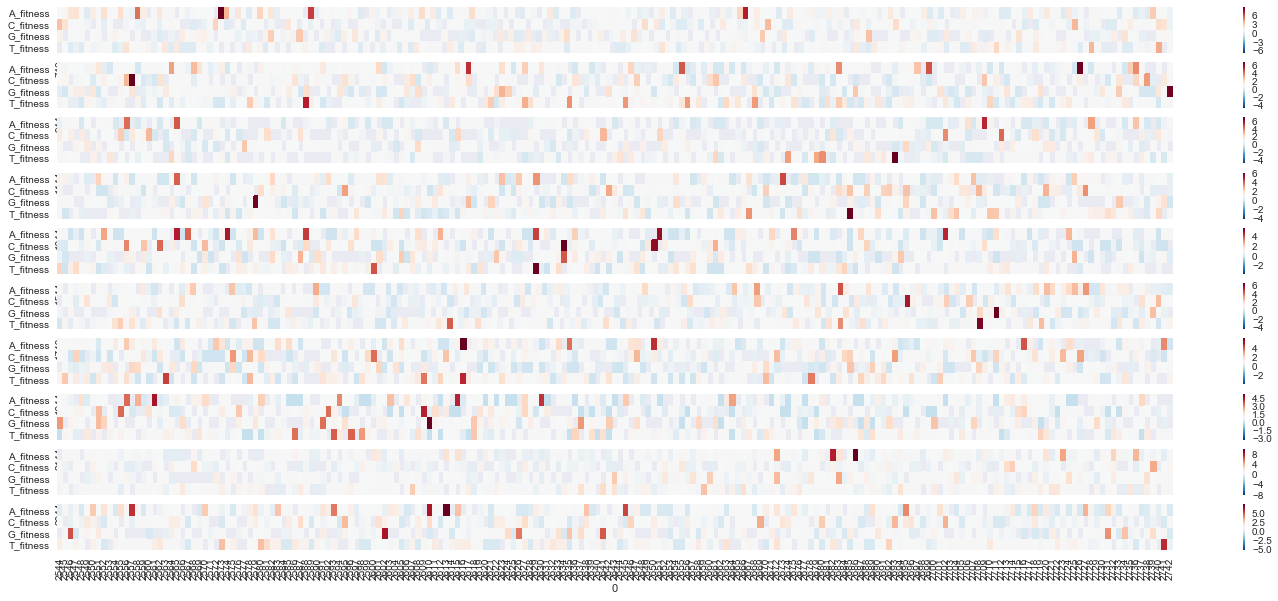

In [119]:
# Plot the probabilities
fig, ax = plt.subplots(10, 1, figsize=(25, 10))
c = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(test_fitness[:200].T, ax=ax[0], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[201:400].T, ax=ax[1], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[401:600].T, ax=ax[2], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[601:800].T, ax=ax[3], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[801:1000].T, ax=ax[4], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[1000:1200].T, ax=ax[5], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[1201:1400].T, ax=ax[6], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[1401:1600].T, ax=ax[7], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[1601:1800].T, ax=ax[8], center=1)#, cmap=c, square=False)
sns.heatmap(test_fitness[1801:2000].T, ax=ax[9], center=1)#, cmap=c, square=False)
plt.show()

In [120]:
# Function that takes two dataframes and returns a dataframe of the fitness values
def fitness_dataframe(df_1, df_2):
    """Return a dataframe of the absolute fitness values for each mutation"""
    
    #test_fitness = pd.DataFrame(index=index, columns=df_polyprotein_1['A_prob']/df_polyprotein_2['A_prob'])
    temp_fitness = pd.DataFrame(df_2['A_prob'] / df_1['A_prob'])
    temp_fitness.columns = ['A_fitness']

    temp_fitness['C_fitness'] = df_2['C_prob'] / df_1['C_prob']
    temp_fitness['G_fitness'] = df_2['G_prob'] / df_1['G_prob']
    temp_fitness['T_fitness'] = df_2['T_prob'] / df_1['T_prob']
    temp_fitness = temp_fitness.replace(np.inf, 1)
    
    return temp_fitness

In [ ]:
# Create all 